<a href="https://colab.research.google.com/github/kommareddysakethreddy/ML-Project-Template/blob/main/notebooks/Data%20Cleaning/CarPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#mounting drive
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
#reading file, also available in '..\data\CarPrice_Assignment.csv'
dataset=pd.read_csv('/content/gdrive/MyDrive/dsaElelctive/CarPrice_Assignment.csv')
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#dropping unnecessary column
dataset.drop('car_ID',axis=1,inplace=True)
dataset.shape

(205, 25)

In [5]:
dataset.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [7]:
CompanyName = dataset['CarName'].apply(lambda x : x.split(' ')[0])
dataset.insert(3,"CompanyName",CompanyName)
dataset.drop(['CarName'],axis=1,inplace=True)


In [8]:
dataset.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
#there might be spelling mistake so replace with correct name
def replace_name(a,b):
    dataset.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

In [10]:
dataset.CompanyName.unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Fetching different types of variables

In [11]:
cat_vars = [var for var in dataset.columns if dataset[var].dtype=='O']
cat_vars

['fueltype',
 'CompanyName',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [12]:
num_vars = [var for var in dataset.columns if var not in cat_vars and var!='Survived']
num_vars

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

No null values present

In [13]:
vars_with_na = [var for var in dataset.columns if dataset[var].isnull().sum()>0]
dataset[vars_with_na].isnull().mean().sort_values(ascending=False)

Series([], dtype: float64)

In [14]:
target='price'

No temporal variables

In [15]:
temp_vars = [var for var in dataset.columns if 'Yr' in var or 'Year' in var]
temp_vars

[]

In [16]:
discrete_vars = [var for var in num_vars if len(dataset[var].unique())<20 ]
discrete_vars

['symboling']

In [17]:
cont_vars = [var for var in num_vars if var not in discrete_vars]
cont_vars

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

plot for descrete variable 

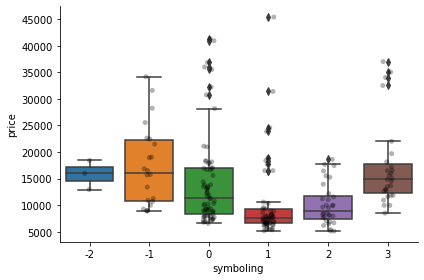

In [18]:
def analyse_disc(df,var):
  df = df.copy()
  sns.catplot(x=var,y=target,data=df, kind="box", height=4, aspect=1.5)
  sns.stripplot(x=var, y=target, data=df, jitter=0.1, alpha=0.3, color='k')
  plt.show()

for var in discrete_vars:
  analyse_disc(dataset,var)

plot for continuos variables

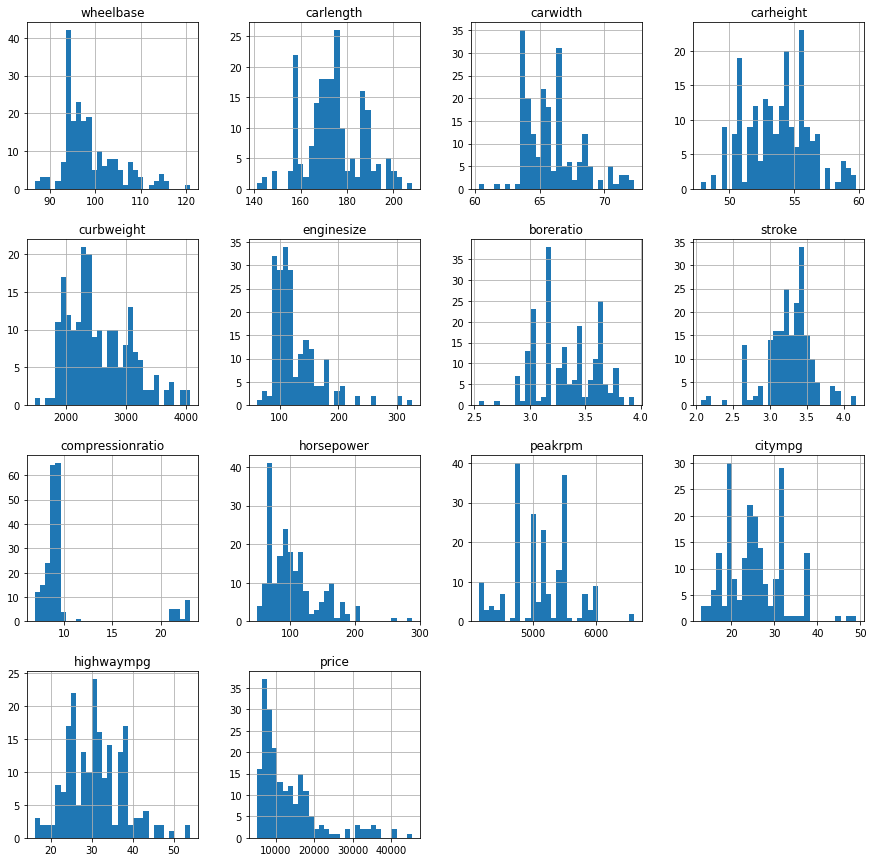

In [19]:
dataset[cont_vars].hist(bins=30,figsize=(15,15))
plt.show()

In [20]:
skewed = ['wheelbase','enginesize','compressionratio','horsepower']
continuos=[]
for var in cont_vars:
  if(var!='price' and var not in skewed):
    continuos.append(var)
continuos

['carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'boreratio',
 'stroke',
 'peakrpm',
 'citympg',
 'highwaympg']

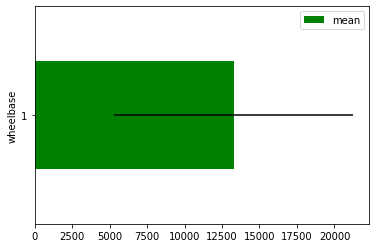

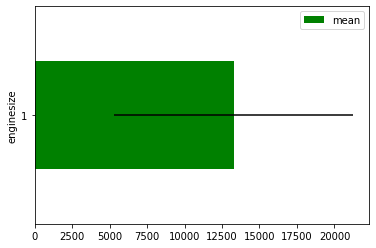

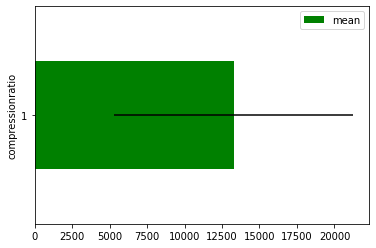

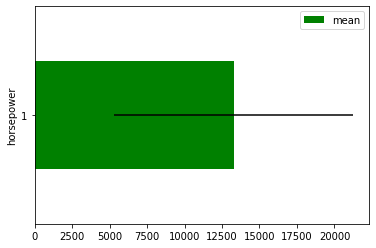

In [21]:
def skew_target(df,var):
  df = df.copy()
  df[var] = np.where(df[var]==0,0,1)
  tmp = df.groupby(var)[target].agg(['mean','std'])
  tmp.plot(kind='barh',y='mean',xerr='std',color='green')
  plt.show()
for var in skewed:
  skew_target(dataset,var)

In [22]:
dataset[cat_vars].head()

,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,alfa-romero,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,audi,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,audi,std,four,sedan,4wd,front,ohc,five,mpfi


In [23]:
dataset.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0



price distibution,  
diesel is being mostly used,  
price for hard top,convertible is more as compared to others

<Figure size 1800x432 with 0 Axes>

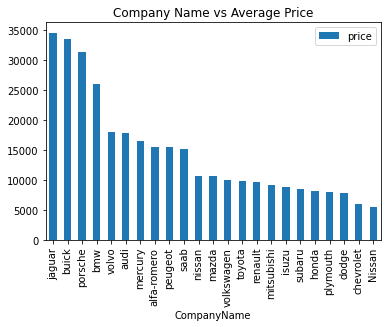

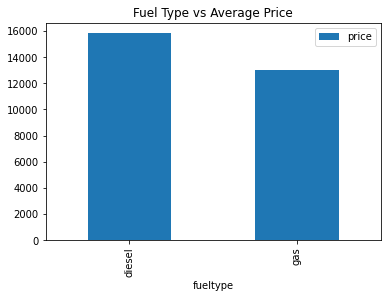

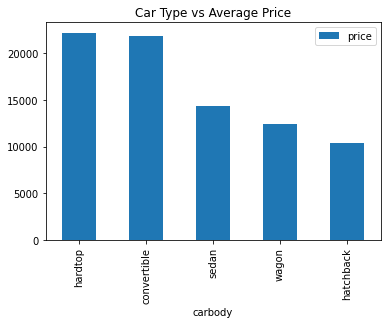

In [24]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(dataset.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(dataset.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(dataset.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

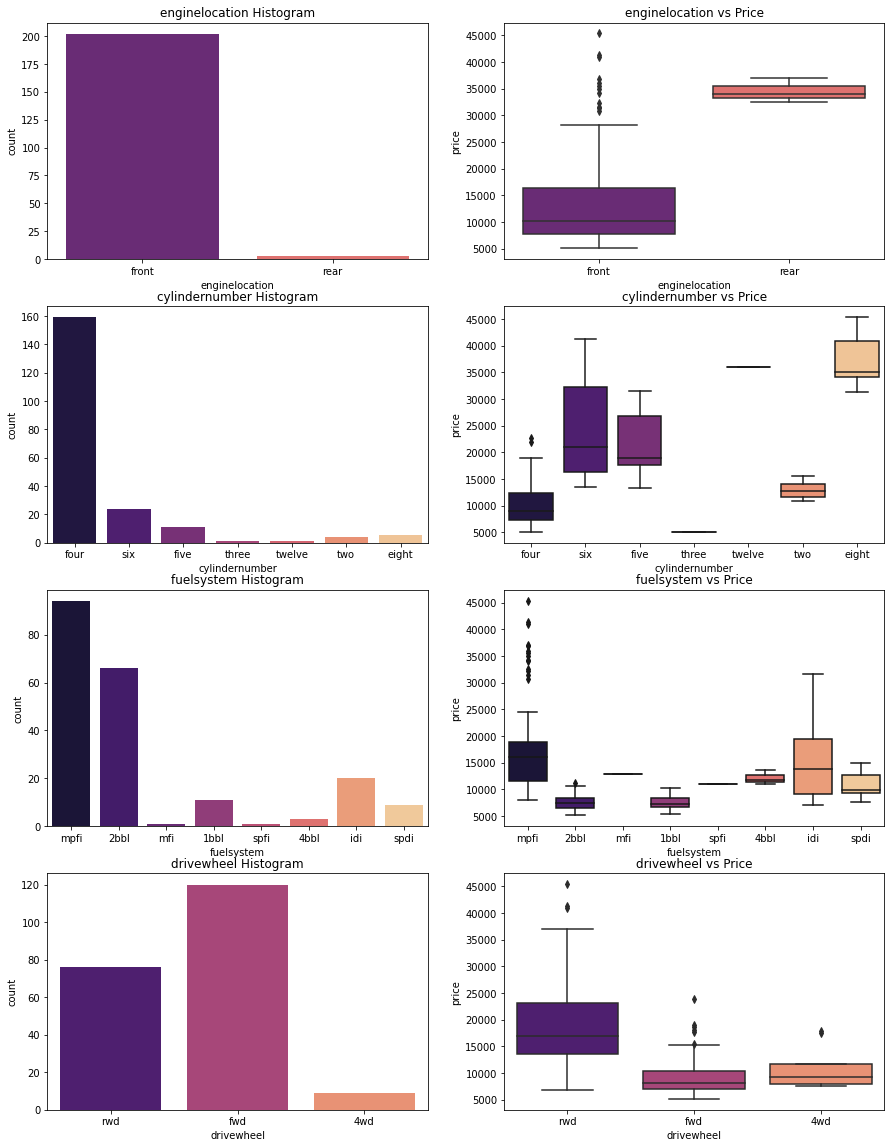

In [25]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(dataset[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=dataset[x], y=dataset.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

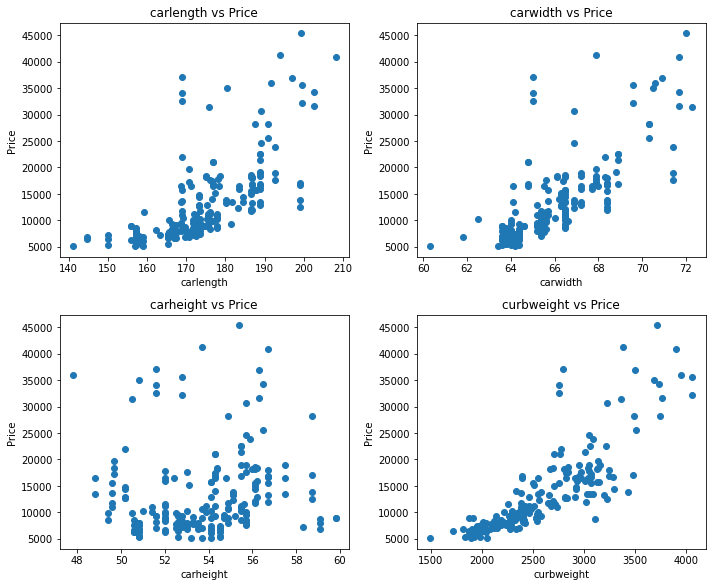

In [26]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(dataset[x],dataset['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

In [27]:
dataset.columns

Index(['symboling', 'fueltype', 'CompanyName', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [28]:
#list of significant variables
cars_lr = dataset[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                     'carlength','carwidth']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4


In [29]:
lists=['fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber']
for var in lists:
  print(pd.unique(dataset[var]))

['gas' 'diesel']
['std' 'turbo']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [30]:
dataset.columns

Index(['symboling', 'fueltype', 'CompanyName', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [31]:
brand_category = dataset['CompanyName'].apply(lambda x : x.split(' ')[0])
dataset.insert(3,"brand_category",brand_category)
dataset.drop(['CompanyName'],axis=1,inplace=True)

In [35]:
#file is present inside data folder '..\data\final_car_prediction'
dataset.to_csv('..\final_carPrediction.csv',index=False)

Finding max, min and mean of the price of cars

In [36]:
np.max(dataset['price')

45400.0

In [37]:
np.min(dataset['price'])


5118.0

In [38]:
np.mean(dataset['price'])

13276.710570731706